In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [6]:
data1=pd.read_csv('churn-bigml-80.csv')

In [7]:
data2 = pd.read_csv('churn-bigml-20.csv')

In [9]:
frames = [data1, data2]

In [10]:
df = pd.concat(frames, sort=False)

In [21]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [19]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [38]:
df = df.rename(columns={'International plan':'I_p',
                                   'Voice mail plan':'v_m_p'})


In [41]:
df['State'] = LabelEncoder().fit_transform(df.State.values)
df['Churn'] = LabelEncoder().fit_transform(df.Churn.values)
df['I_p'] = LabelEncoder().fit_transform(df.I_p.values)
df['v_m_p'] = LabelEncoder().fit_transform(df.v_m_p.values)

In [42]:
df.head()

,State,Account length,Area code,I_p,v_m_p,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [43]:
df.dtypes

State                       int64
Account length              int64
Area code                   int64
I_p                         int64
v_m_p                       int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

#Pregunta a

In [13]:
statics=df.describe()
print(statics)

       Account length    Area code  ...  Total intl charge  Customer service calls
count     3333.000000  3333.000000  ...        3333.000000             3333.000000
mean       101.064806   437.182418  ...           2.764581                1.562856
std         39.822106    42.371290  ...           0.753773                1.315491
min          1.000000   408.000000  ...           0.000000                0.000000
25%         74.000000   408.000000  ...           2.300000                1.000000
50%        101.000000   415.000000  ...           2.780000                1.000000
75%        127.000000   510.000000  ...           3.270000                2.000000
max        243.000000   510.000000  ...           5.400000                9.000000

[8 rows x 16 columns]


In [16]:
df.std(axis=0).max()

54.46738920237136

Para calcular la variable que tiene mayor dispersion utilizamos la variable que tiene mayor desviasión estandar

In [29]:
df.std(axis=0)

State                     14.824911
Account length            39.822106
Area code                 42.371290
Number vmail messages     13.688365
Total day minutes         54.467389
Total day calls           20.069084
Total day charge           9.259435
Total eve minutes         50.713844
Total eve calls           19.922625
Total eve charge           4.310668
Total night minutes       50.573847
Total night calls         19.568609
Total night charge         2.275873
Total intl minutes         2.791840
Total intl calls           2.461214
Total intl charge          0.753773
Customer service calls     1.315491
Churn                      0.352067
dtype: float64

In [ ]:
# Total Day Minutes

#Pregunta b


Estas son las variables que no se aproximan a una distribucion normal, ya que tiene un pvalue <0.05 lo que significa que se rechaza el Ho, lo que significa que no se aproxima a una Distribucion Normal

In [76]:
correlacionadas=pd.DataFrame()

for col in df.columns:
  if col != 'Churn' and ss.normaltest(df[col]).pvalue < 0.05:
    print( col)
    correlacionadas[col]=df[col]

  
correlacionadas.head()

State
Account length
Area code
I_p
v_m_p
Number vmail messages
Total day calls
Total eve calls
Total intl minutes
Total intl calls
Total intl charge
Customer service calls


,State,Account length,Area code,I_p,v_m_p,Number vmail messages,Total day calls,Total eve calls,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,16,128,415,0,1,25,110,99,10.0,3,2.70,1
1,35,107,415,0,1,26,123,103,13.7,3,3.70,1
2,31,137,415,0,0,0,114,110,12.2,5,3.29,0
3,35,84,408,1,0,0,71,88,6.6,7,1.78,2
4,36,75,415,1,0,0,113,122,10.1,3,2.73,3


Variables que se aproximan

In [51]:
for col in df.columns:
  if col != 'Churn' and ss.normaltest(df[col]).pvalue > 0.05:
    print( col )

Total day minutes
Total day charge
Total eve minutes
Total eve charge
Total night minutes
Total night calls
Total night charge


#Pregunta c

In [ ]:
data.dtypes

In [ ]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(20, 20))
sns.heatmap(corr_df, annot=True)
plt.show()

#Pregunta d

In [80]:
for col1 in correlacionadas.columns:
  for col2 in correlacionadas.columns:
    print(col1,' -y- ',col2,'\t \t',ss.spearmanr(correlacionadas[col1],correlacionadas[col2]).correlation)


State  -y-  State 	 	 0.9999999999999999
State  -y-  Account length 	 	 0.0029769733857882316
State  -y-  Area code 	 	 0.015282633026340803
State  -y-  I_p 	 	 -0.004652607511739991
State  -y-  v_m_p 	 	 -0.03179558527065669
State  -y-  Number vmail messages 	 	 -0.029697770146470022
State  -y-  Total day calls 	 	 0.0037904825380961696
State  -y-  Total eve calls 	 	 -0.014652952347091689
State  -y-  Total intl minutes 	 	 -0.004635287685337908
State  -y-  Total intl calls 	 	 0.011813421205141264
State  -y-  Total intl charge 	 	 -0.004635287685337908
State  -y-  Customer service calls 	 	 -0.020955796936096793
Account length  -y-  State 	 	 0.0029769733857882316
Account length  -y-  Account length 	 	 1.0
Account length  -y-  Area code 	 	 -0.01743924742929503
Account length  -y-  I_p 	 	 0.029538175480924758
Account length  -y-  v_m_p 	 	 0.008740787558970405
Account length  -y-  Number vmail messages 	 	 0.0030767516325656496
Account length  -y-  Total day calls 	 	 0.03269002162

In [84]:
correlacionadas.corr(method="spearman")

,State,Account length,Area code,I_p,v_m_p,Number vmail messages,Total day calls,Total eve calls,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
State,1.000000,0.002977,0.015283,-0.004653,-0.031796,-0.029698,0.003790,-0.014653,-0.004635,0.011813,-0.004635,-0.020956
Account length,0.002977,1.000000,-0.017439,0.029538,0.008741,0.003077,0.032690,0.018378,0.014761,0.027453,0.014761,-0.005942
Area code,0.015283,-0.017439,1.000000,0.044039,0.009870,0.010228,-0.004061,-0.005238,0.003164,-0.005177,0.003164,0.031850
I_p,-0.004653,0.029538,0.044039,1.000000,0.006006,0.007829,0.013043,0.004413,0.043836,0.007968,0.043836,-0.030328
v_m_p,-0.031796,0.008741,0.009870,0.006006,1.000000,0.982850,-0.012653,-0.007885,-0.004484,0.001400,-0.004484,-0.022156
Number vmail messages,-0.029698,0.003077,0.010228,0.007829,0.982850,1.000000,-0.012396,-0.007148,-0.001565,0.006248,-0.001565,-0.019639
Total day calls,0.003790,0.032690,-0.004061,0.013043,-0.012653,-0.012396,1.000000,0.013807,0.015139,0.004148,0.015139,-0.020957
Total eve calls,-0.014653,0.018378,-0.005238,0.004413,-0.007885,-0.007148,0.013807,1.000000,0.000213,0.014862,0.000213,0.002697
Total intl minutes,-0.004635,0.014761,0.003164,0.043836,-0.004484,-0.001565,0.015139,0.000213,1.000000,0.017900,1.000000,-0.017374
Total intl calls,0.011813,0.027453,-0.005177,0.007968,0.001400,0.006248,0.004148,0.014862,0.017900,1.000000,0.017900,-0.000598


#Pregunta e

#Pregunta f


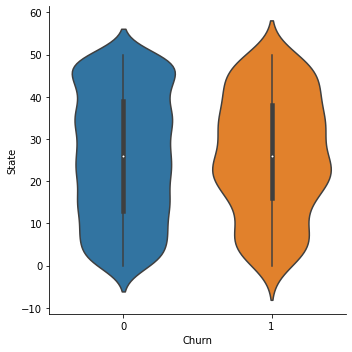

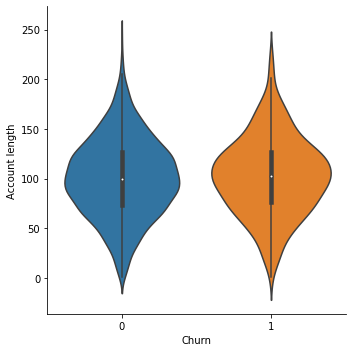

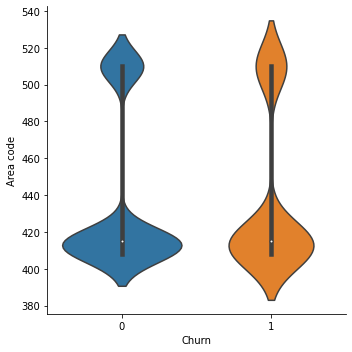

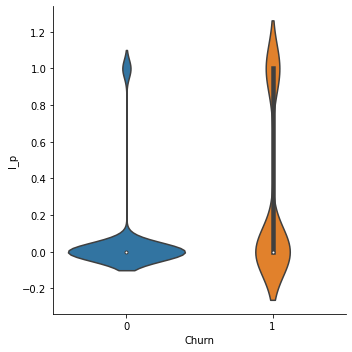

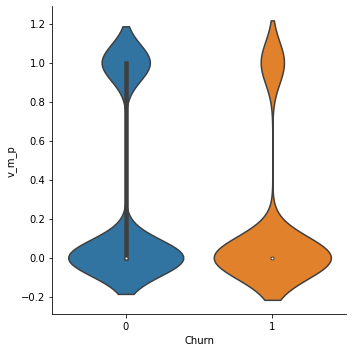

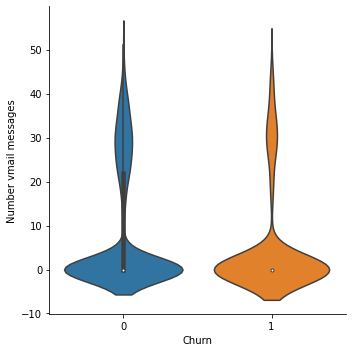

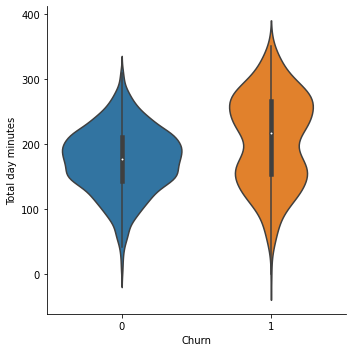

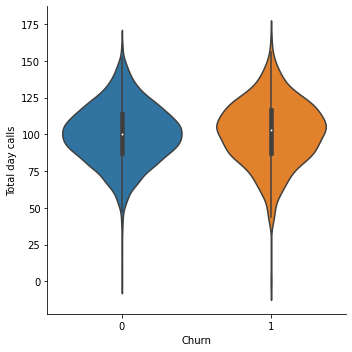

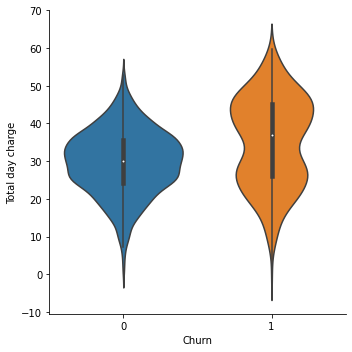

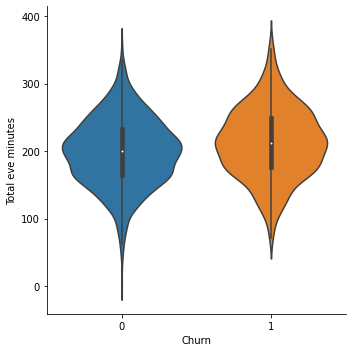

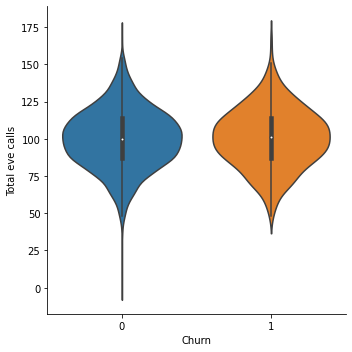

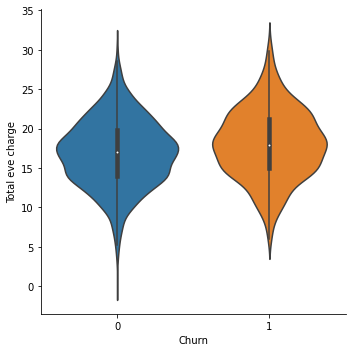

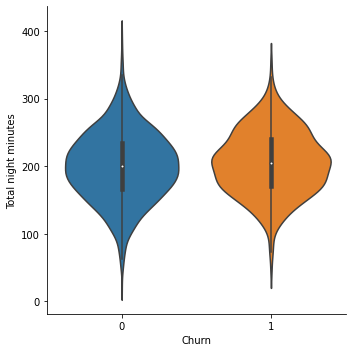

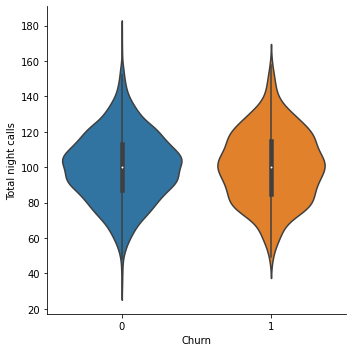

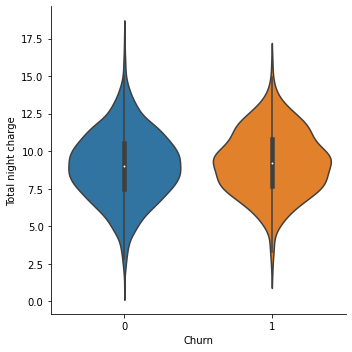

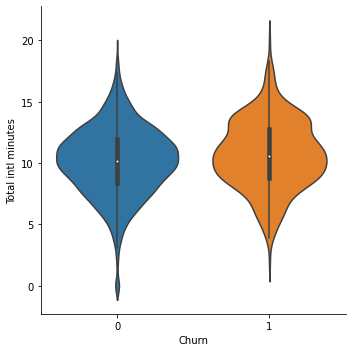

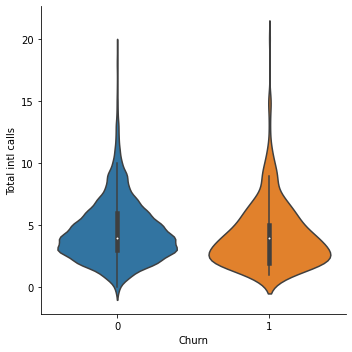

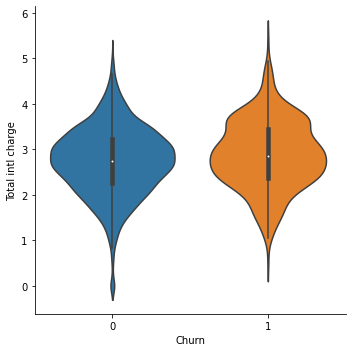

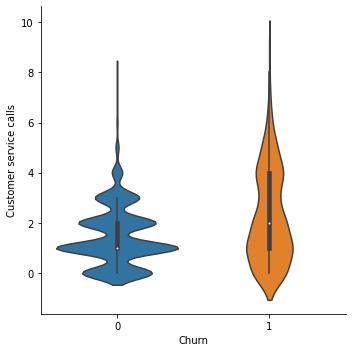

In [85]:
for col in df.columns:
  if (col != 'Churn'):
    sns.catplot(x = "Churn", y = col, data = df, kind = "violin", split = True); 

#Pregunta 2 A

##KNN

[0.87406297 0.86206897 0.87406297 0.86936937 0.87687688]
cv_scores mean:0.8712882297589944
Sensibilidad:  0.45161290322580644
F1:  0.6177736777367774
AUC:  0.860477314450564


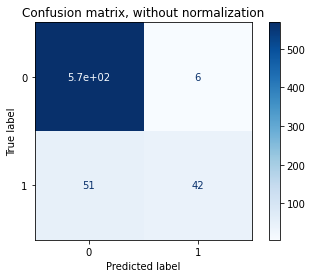

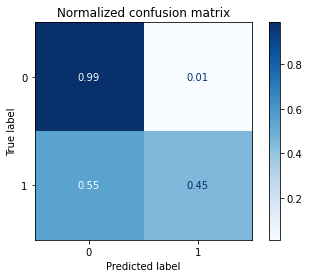

In [91]:
knn_X = df.drop(['Churn'], axis=1)
knn_y = df['Churn']
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, test_size = 0.20, random_state = 0)
knn_X_train = StandardScaler().fit_transform(knn_X_train)
knn_X_test = StandardScaler().fit_transform(knn_X_test)
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), knn_X, knn_y, cv=5)
#Accuracy
print(cv_scores)
#Accuracy Promedio
print("cv_scores mean:{}".format(np.mean(cv_scores)))
#Tuning
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, knn_X_train, knn_y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
best_n_neighbors = 1
for score, n_neig in zip(k_scores,k_range):
  if score == max(k_scores):
    best_n_neighbors = n_neig
# Ahora best_n_neighbors cambió
knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(knn_X_train, knn_y_train)
knn_y_pred = knn_classifier.predict(knn_X_test)
knn_conf_mat = confusion_matrix(knn_y_test, knn_y_pred)
knn_y_pred = knn_classifier.predict(knn_X_test)
knn_y_pred_prob = knn_classifier.predict_proba(knn_X_test)
knn_false_positive_rate, knn_true_positive_rate, thresholds = roc_curve(knn_y_test, knn_y_pred_prob[:,1])
knn_roc_auc = auc(knn_false_positive_rate, knn_true_positive_rate)
#KNN AUC
knn_roc_auc
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn_classifier, knn_X_test, knn_y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

#sensibilidad (verd positivos)
knn_sensi = disp.confusion_matrix[1][1]

#Falso negativos
knn_fn= disp.confusion_matrix[1][0]

#Verdaderos negativos
knn_vn = disp.confusion_matrix[0][0]

#Falsos positivos
knn_fp = disp.confusion_matrix[0][1]

#RECALL:
knn_recall = disp.confusion_matrix[1][1]/(disp.confusion_matrix[1][1]+disp.confusion_matrix[1][0])

#PRECISION:
knn_precision = disp.confusion_matrix[1][1]/(disp.confusion_matrix[1][1]+disp.confusion_matrix[0][1])

#F1:
knn_f1 = 2*((knn_precision*knn_recall)/(knn_precision+knn_recall))

print("Sensibilidad: ", knn_sensi)
print("F1: ", knn_f1)
print("AUC: ", knn_roc_auc)

In [98]:
y_pred_prob = knn_classifier.predict_proba(knn_X_test)

In [99]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(knn_y_test, y_pred_prob[:,1])

In [100]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.860477314450564

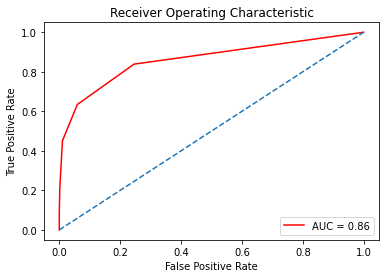

In [101]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Redes Neuronales

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       574
           1       0.69      0.77      0.73        93

    accuracy                           0.92       667
   macro avg       0.82      0.86      0.84       667
weighted avg       0.92      0.92      0.92       667



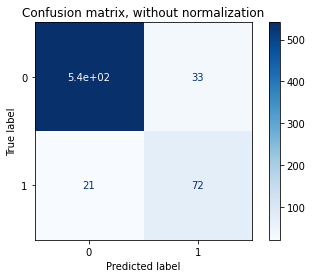

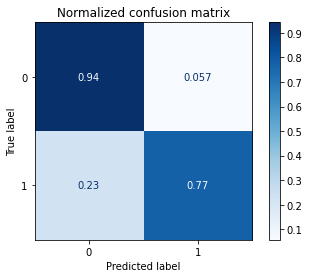

Sensibilidad,   0.7741935483870968
AUC,  0.8867783147877563
F1,  0.8453348878593564


In [107]:
rn_data=df
rn_data.dtypes
#data['Gender'] = LabelEncoder().fit_transform(rn_data.Gender.values)
#knn_X = df.drop(['Churn'], axis=1)
#knn_y = df['Churn']
X = rn_data.drop(['Churn'],axis=1)
y = rn_data['Churn']
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500, alpha=0.0001,
                     solver='adam', random_state=21,tol=0.000000001)
#Tuning
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid = GridSearchCV(MLPClassifier(max_iter=500),param_grid,refit=True,verbose=2,cv=5)

#Redes Neuronales Artificiales
classifier = MLPClassifier(hidden_layer_sizes=(10,30,10),max_iter=500,alpha=0.05).fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)
false_positive_rate_rn, true_positive_rate_rn, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc_rn = auc(false_positive_rate_rn, true_positive_rate_rn)


#print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()


#RECALL:
rn_recall = disp.confusion_matrix[1][1]/(disp.confusion_matrix[1][1]+disp.confusion_matrix[1][0])

#PRECISION:
rn_precision = disp.confusion_matrix[1][1]/(disp.confusion_matrix[1][1]+disp.confusion_matrix[0][1])

#F1:
rn_f1 = 2*((rn_precision*rn_recall)/(rn_precision+rn_recall))


print("Sensibilidad,  ",disp.confusion_matrix[1][1])
sensib_rn=disp.confusion_matrix[1][1]
print("AUC, ",roc_auc_rn)
print("F1, ", rn_f1)


Text(0.5, 0, 'False Positive Rate')

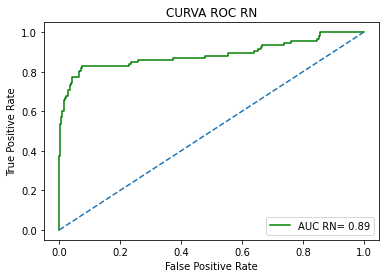

In [131]:
plt.title('CURVA ROC RN')
#RN:
plt.plot(false_positive_rate_rn,true_positive_rate_rn, color='green',label = 'AUC RN= %0.2f' % roc_auc_rn)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')


##Naive Bayes


AUC 0.846895957438837
SENSIBILIDAD 0.5483870967741935


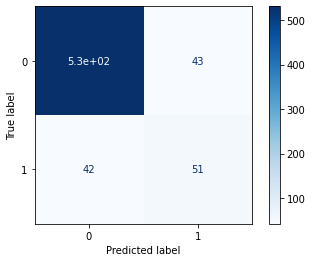

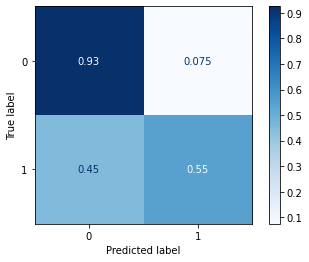

In [118]:
#X = rn_data.drop(['Churn'],axis=1)
#y = rn_data['Churn']

naive_X = df.drop(['Churn'],axis=1)
naive_y = df['Churn']
naive_X_train, naive_X_test, naive_y_train, naive_y_test = train_test_split(naive_X, naive_y, test_size = 0.20, random_state = 0)
naive_classifier = GaussianNB().fit(naive_X_train, naive_y_train)
naive_y_pred = naive_classifier.predict(naive_X_test)
naive_y_pred_prob = naive_classifier.predict_proba(naive_X_test)
naive_false_positive_rate, naive_true_positive_rate, thresholds = roc_curve(naive_y_test, naive_y_pred_prob[:,1])
naive_roc_auc = auc(naive_false_positive_rate, naive_true_positive_rate)
print('AUC', naive_roc_auc)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(naive_classifier, naive_X_test, naive_y_test,cmap=plt.cm.Blues,normalize=normalize)
    #disp.ax_.set_title(title)
  
naive_sensi = disp.confusion_matrix[1][1]
print('SENSIBILIDAD',naive_sensi)

##Decision Tree

In [122]:
##X = rn_data.drop(['Churn'],axis=1)
#y = rn_data['Churn']
dt_x = df.drop(['Churn'],axis=1)
dt_y = df['Churn']

dt_x_train, dt_x_test, dt_y_train, dt_y_test = \
  train_test_split(dt_x, dt_y, test_size = 0.20, random_state = 0)

dt_param_grid = {
    'max_depth': [2],
    'min_samples_leaf': [5],
    'criterion': ["gini", "entropy"]
}
dt_grid = GridSearchCV(tree.DecisionTreeClassifier(),dt_param_grid,refit=True,verbose=2,cv=5)
dt_grid.fit(dt_x_train, dt_y_train)

dt_classifier = dt_grid.best_estimator_

dt_y_pred = dt_classifier.predict(dt_x_test)
dt_y_pred_prob = dt_classifier.predict_proba(dt_x_test)

dt_false_positive_rate, dt_true_positive_rate, dt_thresholds = \
  roc_curve(dt_y_test, dt_y_pred_prob[:,1])

dt_roc_auc = auc(dt_false_positive_rate, dt_true_positive_rate)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5 ..............
[CV]  criterion=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


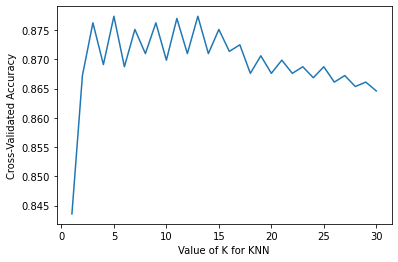

4
vecino 1 = 0.8435883382170036
vecino 2 = 0.8672154647216308
vecino 3 = 0.8762182824939744
vecino 4 = 0.8690923400158808
vecino 5 = 0.8773432833723325
vecino 6 = 0.8687171054943047
vecino 7 = 0.8750918762428764
vecino 8 = 0.8709664045646506
vecino 9 = 0.8762168771212344
vecino 10 = 0.8698414036862927
vecino 11 = 0.8769673461643865
vecino 12 = 0.8709657018782806
vecino 13 = 0.8773418779995923
vecino 14 = 0.8709649991919106
vecino 15 = 0.8750904708701365
vecino 16 = 0.8713423417725966
vecino 17 = 0.8724666399645846
vecino 18 = 0.8675914019295767
vecino 19 = 0.8705918727294446
vecino 20 = 0.8675921046159468
vecino 21 = 0.8698435117454026
vecino 22 = 0.8675928073023167
vecino 23 = 0.8687185108670447
vecino 24 = 0.8668430409455347
vecino 25 = 0.8687178081806748
vecino 26 = 0.8660925719023828
vecino 27 = 0.8672182754671107
vecino 28 = 0.8653428055456007
vecino 29 = 0.8660932745887526
vecino 30 = 0.8645923365024488
El vecino mas cercano es 4


In [148]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

a=0
for i in k_scores:
  if max(k_scores) == i:
    break
  a+=1

print(a)
b=0
for i in k_scores:
  b+=1
  print('vecino',b,'=',i)

print('El vecino mas cercano es',a)

#Pregunta 2 B

Desicion Tree
[[571   3]
 [ 67  26]]


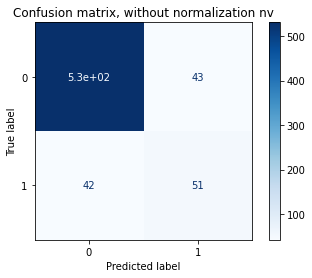

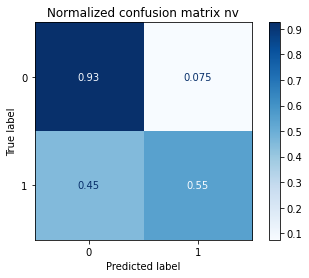

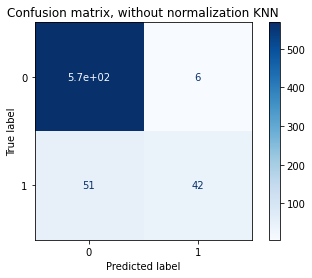

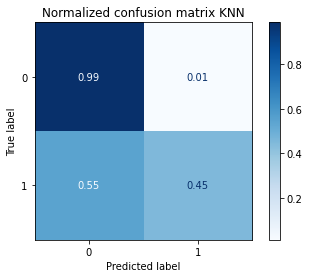

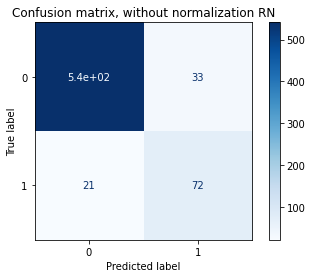

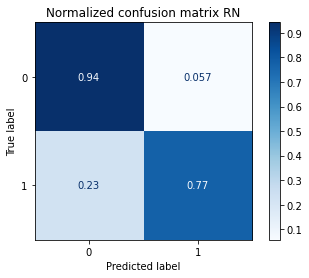

In [130]:
#Naive Bayes
titles_options = [("Confusion matrix, without normalization nv", None),
                  ("Normalized confusion matrix nv", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(naive_classifier, naive_X_test, naive_y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

#Decision Tree
print('Desicion Tree')
dt_conf = confusion_matrix(dt_y_test, dt_y_pred)
print(dt_conf)


#KNN
titles_options = [("Confusion matrix, without normalization KNN", None),
                  ("Normalized confusion matrix KNN", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn_classifier, knn_X_test, knn_y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)


#Redes Neuronales
titles_options = [("Confusion matrix, without normalization RN", None),
                  ("Normalized confusion matrix RN", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)


print('AUC NV',naive_roc_auc)
print('AUC DT',dt_roc_auc)
print('AUC KNN',knn_roc_auc)
print('AUC RN',roc_auc_rn)

#Pregunta 2 C

Text(0.5, 0, 'False Positive Rate')

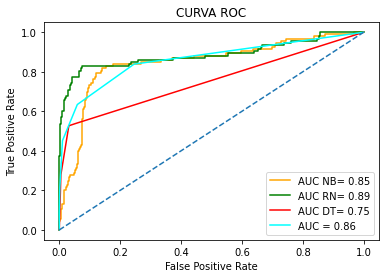

In [123]:
plt.title('CURVA ROC')


#Naive:
plt.plot(naive_false_positive_rate,naive_true_positive_rate, color='orange',label = 'AUC NB= %0.2f' % naive_roc_auc)
#RN:
plt.plot(false_positive_rate_rn,true_positive_rate_rn, color='green',label = 'AUC RN= %0.2f' % roc_auc_rn)
#DT:
plt.plot(dt_false_positive_rate,dt_true_positive_rate, color='red',label = 'AUC DT= %0.2f' % dt_roc_auc)
#KNN:
plt.plot(knn_false_positive_rate,knn_true_positive_rate, color='cyan',label = 'AUC = %0.2f' % knn_roc_auc)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')